In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [75]:
#Functions for use downstream

def read_file(filename,cols=['Date','Adj Close']):
    """Read in a file name and return dataframe with the specified columns"""
    columns = cols
    df= pd.read_csv(filename, index_col="Date",
                    parse_dates=True,usecols=columns,
                    na_values=['nan'])
    return df   


def test_multi_read(folder_path,start_date,
                    end_date,symbols,log=False,
                    cols=['Date','Adj Close']):
    """Load data from path using dictionary of symbols, 
    start and end dates and columns needed"""
    #Define date range
    print("symbols requested: ", symbols)
    dates =  pd.date_range(start_date,end_date)
    print("date range selected:", dates)
    columns = cols
    #Create empty dataframe with dates index
    df1 = pd.DataFrame(index=dates)
    if log==True:
        print(df1)

    for symbol in symbols:
        filename =  folder_path + '{}'.format(symbol) + '.csv'
        if log==True:
             print(filename)
        df_temp = read_file(filename,columns)
        if log==True:
            print(df_temp.head())
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1 = df1.join(df_temp, how="inner")
        if log==True:
             print(df1.head())
    return df1

def plot_data(df,title="Stock prices"):
    """Plot the input dataframe df, add axes labels and title """
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()
    
def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range."""
    df_temp = df.loc[start_index:end_index,columns]
    plot_data(df_temp)
    
def normalize_data(df):
    """Normalize data with respect to first entry in the dataframe"""
    return df/df.iloc[0,:]

def plot_normalized_data(df,title="Stock prices"):
    """Plot normalized data"""
    df = normalize_data(df)
    ax = df.plot(title=title)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.axhline(y=1,color="black",linestyle="--")
    plt.show()
    
def get_rolling_mean(df,window=20,log=False):
    return df.rolling(window).mean()

def get_rolling_sd(df,window=20,log=False):
    return df.rolling(window).std()

def get_bollinger_bands(roll_mean,roll_sd):
    upper_band = roll_mean + roll_sd *2
    lower_band = roll_mean - roll_sd *2
    return upper_band,lower_band

def plot_data_stats(df,window=20,title="Stock prices"):
    """Plot the input dataframe df, add axes labels and title """
    ax = df.plot(title=title)
    rm = get_rolling_mean(df,window)
    rsd = get_rolling_sd(df,window)
    ub,lb =  get_bollinger_bands(rm,rsd)
    colname = rm.columns.values.tolist()
    rm = rm.add_prefix('Rolling Mean_')
    colname = ub.columns.values.tolist()
    ub = ub.add_prefix('Bol_Upper_')
    colname = lb.columns.values.tolist()
    lb = lb.add_prefix('Bol_Lower_')
    ax = rm.plot(ax=ax)
    ax = ub.plot(ax=ax)
    ax = lb.plot(ax=ax)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()  

def get_daily_returns(df,log=False):
    daily_returns = ((df / df.shift(1))-1)*100
    daily_returns.iloc[0,:]=0
    ax = daily_returns.plot(title="Daily returns")
    ax.set_xlabel("Date")
    ax.set_ylabel("% return")
    plt.show()
    if log==True:
        return daily_returns
    else:
        print("logging disabled")

def get_cumulative_return(df,log=False):
    price_t0 =  df.iloc[0]
    cum_returns = ((df/price_t0)-1)*100
    ax = cum_returns.plot(title="Cumulative returns")
    ax.set_xlabel("Date")
    ax.set_ylabel("% return")
    plt.show()        
    if log==True:
        return cum_returns
    else:
        print("logging disabled")

In [127]:
#Testing of new functions here


# def get_daily_returns_manual(df,log=False):
#     daily_returns = df.copy()
#     daily_returns[1:] = (df[1:]/(df[:-1].values)-1)*100
#     daily_returns.iloc[0,:]=0
#     ax = daily_returns.plot(title="Daily returns")
#     ax.set_xlabel("Date")
#     ax.set_ylabel("% return")
#     plt.show()
#     if log==True:
#         return daily_returns
#     else:
#         print("logging disabled")
#
# if __name__ == "__main__":
#     sym = ['GOOG']
#     fol_path = '../data/raw/'
#     strt_date = '2012-07-01'
#     fin_date = '2013-09-30'
#     cols_selected = ['Date','Adj Close']
#     df = test_multi_read(fol_path,strt_date,fin_date,sym,cols=cols_selected)
#     plot_data_stats(df)
#     print(get_daily_returns(df))
#     print(get_cumulative_return(df))
#     print(df.iloc[0])

symbols requested:  ['SPY']
date range selected: DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=1461, freq='D')


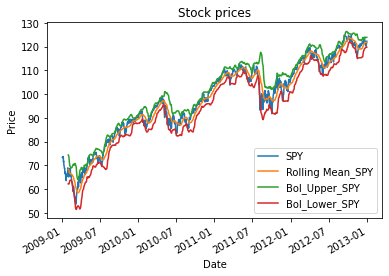

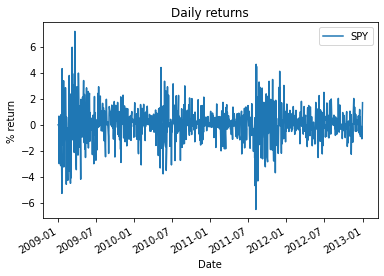

                 SPY
2009-01-02  0.000000
2009-01-05 -0.118348
2009-01-06  0.667748
2009-01-07 -2.995600
2009-01-08  0.408074


In [133]:
if __name__ == "__main__":
    sym = ['SPY']
    fol_path = '../data/raw/'
    strt_date = '2009-01-01'
    fin_date = '2012-12-31'
    cols_selected = ['Date','Adj Close']
    df = test_multi_read(fol_path,strt_date,fin_date,sym,cols=cols_selected)
    plot_data_stats(df)
    dr = get_daily_returns(df, log=True)
    print(dr.head())
